In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("MaunaLoaDailyTemps.csv", index_col='DATE', parse_dates=True)

In [4]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [5]:
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [6]:
df.corr()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
MinTemp,1.000000,0.756071,0.917456,-0.426821,0.300492
MaxTemp,0.756071,1.000000,0.951039,-0.374928,0.275876
AvgTemp,0.917456,0.951039,1.000000,-0.422829,0.304711
Sunrise,-0.426821,-0.374928,-0.422829,1.000000,-0.739530
Sunset,0.300492,0.275876,0.304711,-0.739530,1.000000


In [7]:
df=df.dropna()

In [8]:
print("Shape of Data :", df.shape)

Shape of Data : (1821, 5)


In [10]:
df.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [17]:
display(df.dtypes)

MinTemp    float64
MaxTemp    float64
AvgTemp    float64
Sunrise      int64
Sunset       int64
dtype: object

<AxesSubplot:xlabel='DATE'>

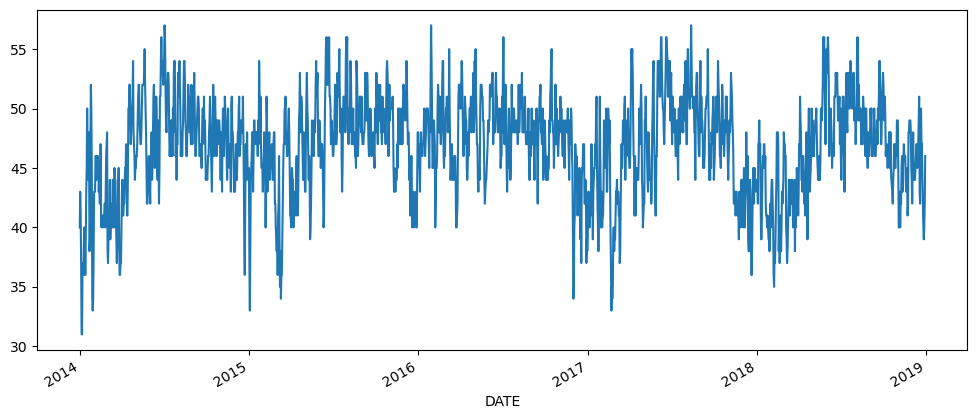

In [8]:
df['AvgTemp'].plot(figsize=(12,5))

In [18]:
#Checking for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [19]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068782
2. P-Value :  8.675937480199415e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872
